# 1D Fourier Transform - part 1

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import my_functions as mfun

## Topics

* [Sine and cosine functions](#sec1)


* [Fourier series defined as a combination of sines and cosines for functions with period $2 \pi$](#sec2)

    * [Calculating $a_{n}$ and $b_{n}$ by using the orthogonality relations between sine and cosine functions](#subsec2.1)


* notebook `fourier_series_2pi.ipynb`

<a id='sec1'></a>

## Sine and cosine functions

We known from trigonometry that [sine](http://mathworld.wolfram.com/Sine.html) and [cosine](http://mathworld.wolfram.com/Cosine.html) are periodic functions (with period $\lambda = 2  \pi$) that are bounded between $-1$ and $1$.

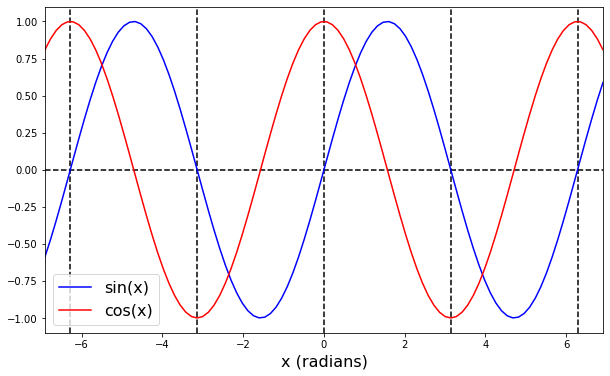

In [2]:
mfun.sine_cosine(-2.2*np.pi, 2.2*np.pi)

**<a id='fig1'>Figure 1</a>**: *Sine and cosine functions. The vertical lines are located at multiples of $\pi$*.

According to the [Figure 1](#fig1), we can see that $\sin \left( x \right)$ **is an odd function** and $\cos \left( x \right)$ **is an even function**, e.g.,

<a id='eq1'></a>

$$
\sin \left( -x \right) = -\sin \left( x \right) \tag{1}
$$

and

<a id='eq2'></a>

$$
\cos \left( -x \right) = \cos \left( x \right) \: . \tag{2}
$$

Besides, we know that

<a id='eq3a'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi} \sin \left( x \right) \; dx = 0 \tag{3a}
$$

and

<a id='eq3b'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi}  \cos \left( x \right) \; dx = 0 \: , \tag{3b}
$$

for any integer $k$.

Consider the following sine and cosine functions:

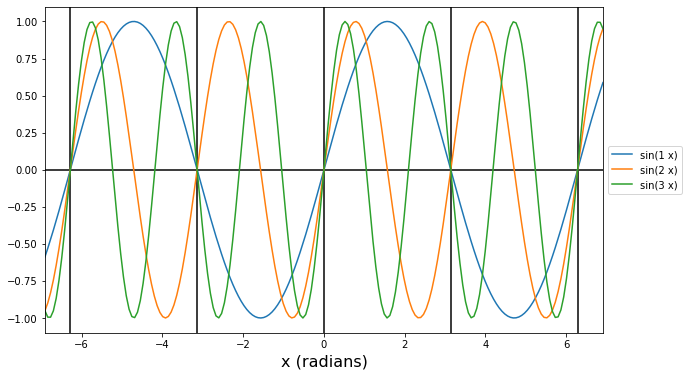

In [8]:
mfun.sine(-2.2*np.pi, 2.2*np.pi, [i for i in range(1,4)], npoints=200)
#mfun.sine(-2.2*np.pi, 2.2*np.pi, [2], npoints=200)

**<a id='fig2'>Figure 2</a>**: *Sine functions with different periods. The vertical lines are located at multiples of $\pi$*.

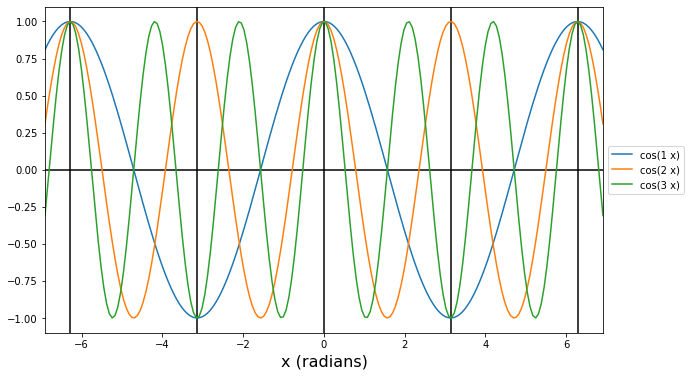

In [9]:
mfun.cosine(-2.2*np.pi, 2.2*np.pi, [i for i in range(1,4)], npoints=200)

**<a id='fig3'>Figure 3</a>**: *Cosine functions with different periods. The vertical lines are located at multiples of $\pi$.*

Figures [2](#fig2) and [3](#fig3) show the functions $\sin (n \, x)$ and $\cos (n \, x)$ for $n = 1$, $2$, and $3$. Notice that the integer $k$ determines the number of times that the sine and cosine functions complete a cycle on the interval $\left[ \, 0 \, , \, 2 \pi \, \right]$. In this case, the period $\lambda$ of these functions can be defined as follows:

<a id='eq4'></a>

$$
\lambda = \frac{2 \pi}{n} \: . \tag{4}
$$

Notice that all functions $\sin (n \, x)$ and $\cos (n \, x)$, $n = 1, 2, 3, \dots$,


* have a period represented by $\lambda$, which is the smallest period, and


* have a common period equal to $2 \pi$.

Similarly to equations [3a](#eq3a) and [3b](#eq3b),

<a id='eq5a'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi} \sin \left( n \, x \right) \; dx = 0 \: , 
\quad \text{for any integer} \; n \: , \tag{5a}
$$

and

<a id='eq5b'></a>

$$
\int \limits_{k \pi}^{\left( k + 2\right) \pi} \cos \left( n \, x \right) \; dx =
\begin{cases} \begin{split}
2 \pi \: &, \quad n = 0 \\
0 \: &, \quad n \ne 0
\end{split} \end{cases} \quad . \tag{5b}
$$

What about a function obtained by stacking $\sin (n \, x)$ and $\cos (n \, x)$ defined by different integers $n$?

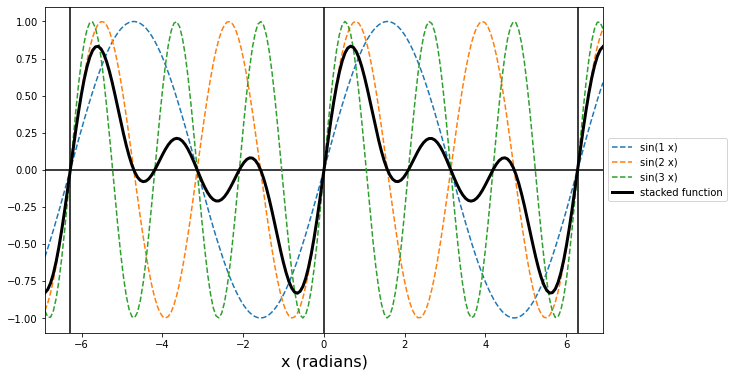

In [10]:
x, sine = mfun.sine_stack(-2.2*np.pi, 2.2*np.pi, [i for i in range(1,4)], npoints=200)

**<a id='fig4'>Figure 4</a>**: *Periodic function obtained by stacking $\sin (n \, x)$ defined by different integers $n$. For convenience, the function is normalized by the number of stacked functions. The vertical lines are located at multiples of $2\pi$.*

Notice that the resulting function obtained by stacking sine functions (thick black line in Figure [4](#fig4))


* has a period equal to $2 \pi$, which is the common period of all functions $\sin \left( n \, x\right)$, and


* is also an odd function, like all functions $\sin \left( n \, x\right)$.

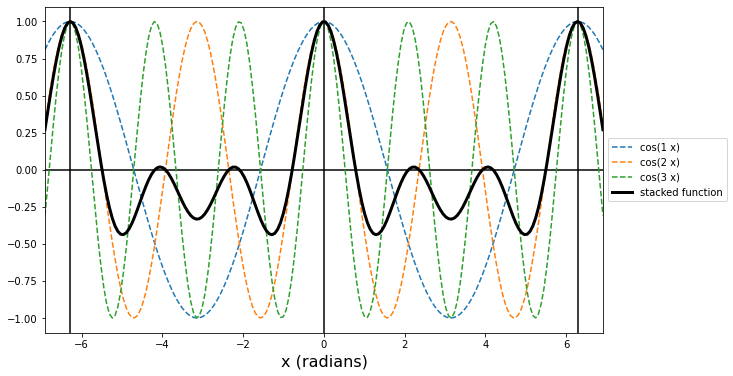

In [11]:
x, cosine = mfun.cosine_stack(-2.2*np.pi, 2.2*np.pi, [i for i in range(1,4)], npoints=200)

**<a id='fig5'>Figure 5</a>**: *Periodic function obtained by stacking $\cos (n \, x)$ defined by different integers $n$. For convenience, the function is normalized by the number of stacked functions. The vertical lines are located at multiples of $2\pi$.*

Similarly, the resulting function obtained by stacking cosine functions (thick black line in Figure [5](#fig5))


* has a period equal to $2 \pi$, which is the common period of all functions $\cos \left( n \, x\right)$, and


* is also an even function, like all functions $\cos \left( n \, x\right)$.

<a id='sec2'></a>

## Fourier series defined as a combination of sines and cosines for functions with period $2 \pi$

Let $f (x)$ be a function that is periodic over $\left[ 0 \, , \, 2 \pi \right]$, e. g., $f(x) = f(x + k \, 2 \pi)$, where $k$ is any integer, and satisfies the [Dirichlet conditions](https://en.wikipedia.org/wiki/Dirichlet_conditions) on this interval. In this case, $f(x)$ can be represented by an infinite series of sine and cosine functions given by

<a id='eq6'></a>

$$
f(x) = \frac{a_{0}}{2} + \sum \limits_{n=1}^{N} 
\underbrace{a_{n} \cos \left( n \, x \right)}_{\text{even functions}} + 
\underbrace{b_{n} \sin \left( n \, x \right)}_{\text{odd functions}} \: , \quad N \to \infty \: , \tag{6}
$$

where $a_{n}$ and $b_{n}$, $n = 0, 1, 2, \dots$, are constants. Equation [6](#eq6) represents the **[Fourier series](https://en.wikipedia.org/wiki/Fourier_series)** of the function $f(x)$.

<a id='subsec2.1'></a>

### Calculating $a_{n}$ and $b_{n}$ by using the orthogonality relations between sine and cosine functions

Let $m$ and $n$ be integers, e. g., $m \, , \, n \in \mathbb{N}$. The [orthogonality relations](http://tutorial.math.lamar.edu/Classes/DE/PeriodicOrthogonal.aspx) between sine and cosine functions are given by:

<a id='eq7'></a>

$$
\int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, \sin \left( n \, x \right) \, dx =
\begin{cases}
\pi \: , \quad m = n > 0 \\
0 \: , \quad m \ne n
\end{cases} \: , \tag{7}
$$

<a id='eq8'></a>

$$
\int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, \cos \left( n \, x \right) \, dx =
\begin{cases} \begin{split}
2\pi \: &, \quad m = n = 0 \\
\pi \: &, \quad m = n > 0 \\
0 \: &, \quad m \ne n
\end{split} \end{cases} \: , \tag{8}
$$

and

<a id='eq9'></a>

$$
\int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, \cos \left( n \, x \right) \, dx = 0
\: , \quad \text{for any integers} \; m, n .
\tag{9}
$$

By multiplying equation [6](#eq6) by $\cos \left( m \, x \right)$ and integrating the result over $\left[ -\pi, \pi \right]$, we obtain

<a id='eq10'></a>

$$
\int \limits_{-\pi}^{\pi} f(x) \, \cos \left( m \, x \right) \, dx = 
\left[ \frac{a_{0}}{2} \int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, dx \right] + 
\sum \limits_{n=1}^{\infty} 
\left[ a_{n} \int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, \cos \left( n \, x \right) \, dx  \right] + 
\sum \limits_{n=1}^{\infty}
\left[ b_{n} \int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, \sin \left( n \, x \right) \, dx  \right]
\: . \tag{10}
$$

From equations [5b](#eq5b), [8](#eq8), and [9](#eq9) we obtain

<a id='eq11a'></a>

$$
\frac{a_{0}}{2} \int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, dx =
\begin{cases} \begin{split}
\pi \, a_{0} \: &, \quad m = 0 \\
0 \: &, \quad m \ne 0
\end{split} \end{cases} \quad , \tag{11a}
$$

<a id='eq11b'></a>

$$
a_{n} \int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, \cos \left( n \, x \right) \, dx =
\begin{cases} \begin{split}
0 \: &, \quad m = 0 \\
\pi \, a_{n} \: &, \quad m \ne 0
\end{split} \end{cases} \quad , \tag{11b}
$$

and

<a id='eq11c'></a>

$$
b_{n} \int \limits_{-\pi}^{\pi} \cos \left( m \, x \right) \, \sin \left( n \, x \right) \, dx = 0
\: , \quad \text{for any integer} \; m \: . \tag{11c}
$$

Similarly, by multiplying equation [6](#eq6) by $\sin \left( m \, x \right)$ and integrating the result over $\left[ -\pi, \pi \right]$, we obtain

<a id='eq12'></a>

$$
\int \limits_{-\pi}^{\pi} f(x) \, \sin \left( m \, x \right) \, dx = 
\left[ \frac{a_{0}}{2} \int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, dx \right] + 
\sum \limits_{n=1}^{\infty} 
\left[ a_{n} \int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, \cos \left( n \, x \right) \, dx  \right] + 
\sum \limits_{n=1}^{\infty}
\left[ b_{n} \int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, \sin \left( n \, x \right) \, dx  \right]
\: . \tag{12}
$$

From equations [5a](#eq5a), [7](#eq7), and [9](#eq9) we obtain

<a id='eq13a'></a>

$$
\frac{a_{0}}{2} \int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, dx = 0
\: , \quad \text{for any integer} \; m \: , \tag{13a}
$$

<a id='eq13b'></a>

$$
a_{n} \int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, \cos \left( n \, x \right) \, dx = 0
\: , \quad \text{for any integer} \; m \: , \tag{13b}
$$

and

<a id='eq13c'></a>

$$
b_{n} \int \limits_{-\pi}^{\pi} \sin \left( m \, x \right) \, \sin \left( n \, x \right) \, dx =
\begin{cases} \begin{split}
0 \: &, \quad m = 0 \\
\pi \, b_{n} \: &, \quad m \ne 0
\end{split} \end{cases} \quad . \tag{13c}
$$

Finally, from equations [10](#eq10)$-$[13c](#eq13c) we obtain

<a id='eq14'></a>

$$
a_{0} = \frac{1}{\pi} \int \limits_{-\pi}^{\pi} f (x) \, dx \quad , \tag{14}
$$

<a id='eq15'></a>

$$
a_{n} = \frac{1}{\pi} \int \limits_{-\pi}^{\pi} \cos \left( n \, x \right) \, f (x) \; dx \quad , \tag{15}
$$

and

<a id='eq16'></a>

$$
b_{n} = \frac{1}{\pi} \int \limits_{-\pi}^{\pi} \sin \left( n \, x \right) \, f (x) \; dx \quad . \tag{16}
$$